# Just In Time Trajectory

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from trajectory.planner import * 
from trajectory.plot import * 
import matplotlib.pyplot as plt
from IPython.display import display
import trajectory as tj
import pandas as pd
import numpy as np
from math import sqrt

pd.set_option('display.max_columns', None)

In [11]:


def explain(sl, moves, update_f=None):
    
    n = len(moves)+1
    
    fig, axes = plt.subplots(n,1, figsize=(20,n*2.5))
    axes = np.ravel(axes)
    axi = 0

    for move in moves:
        s = sl.rmove(move, update=False)
        plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1 
        display(sl.params); 
        print('---')
        if update_f:
            update_f(sl, s)
            
    plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1 
    display(sl.params); 
    print('---')

0.3002|[0        250↗   501@4999  ↘250        0]
0.3002|[0       -250↗  -501@4999  ↘-250       0]
0.3002|[0        250↗   501@4999  ↘250     4999]
0.1501|[4999       0↗   250@5000  ↘250     5000]
0.2502|[5000       0↗   751@5000  ↘250     5000]
0.2002|[5000       0↗   751@5000  ↘250        0]

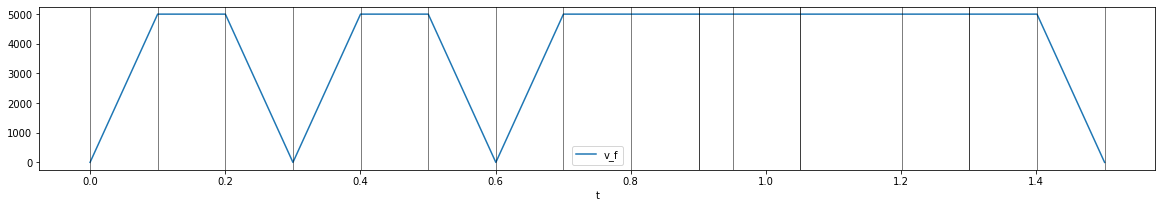

In [43]:
def run(joints, moves):
    sl = SegmentList(joints)
    
    for move in moves:
        sl.rmove(move)
        
    return sl

x = 1000 + 1
sl = run([Joint(5_000, 50_000)],( [x], [-x], [x], [x/2], [x],[x] ))
plot_segment_list(sl.dataframe)
sl

0.2000|[0          0↗  1000@5000  ↘0          0]
0.2000|[0          0↗ -1000@5000  ↘0          0]
0.2000|[0          0↗  1000@5000  ↘0       5000]
0.1000|[5000     250↗   250@0     ↘0          0]
0.2000|[0          0↗  1000@5000  ↘0       5000]
0.2000|[5000       0↗   750@5000  ↘250        0]

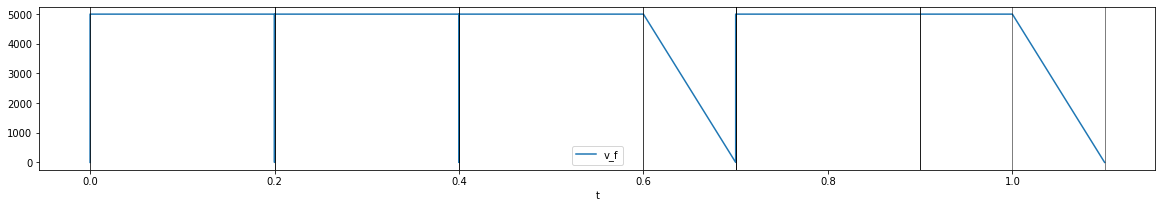

In [44]:
x = 1000
sl = run([Joint(5_000, 50_000)],( [x], [-x], [x], [x/2], [x],[x] ))
plot_segment_list(sl.dataframe)
sl

,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x,sum_x,calc_t
0,0,0,0,5000,1.0,1,5000,5000,0,0,5000,1.0,5000,5000,0,0,5000,5000,5000,5000,1.0


---


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x,sum_x,calc_t
0,0,0,1.0,5000,1.1,1,0,0,250.0,0.1,4500.0,0.8,5000,5000,250.0,0.1,0,5000,4500,5000,1.1
1,1,0,0.0,5000,1.0,1,5000,5000,0.0,0.0,5000.0,1.0,5000,5000,0.0,0.0,5000,5000,5000,5000,1.0


---


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x,sum_x,calc_t
0,0,0,1.0,5000,1.10,1,0,0,250.0,0.1,4500.0,0.8,5000,5000,250.0,0.1,5000,5000,4750,5000,1.05
1,1,0,1.0,5000,1.05,1,5000,5000,0.0,0.0,4750.0,0.9,5000,5000,250.0,0.1,0,5000,4750,5000,1.05
2,2,0,0.0,5000,1.00,-1,5000,5000,0.0,0.0,5000.0,1.0,5000,5000,0.0,0.0,5000,5000,5000,5000,1.00


---


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x,sum_x,calc_t
0,0,0,1.0,5000,1.05,1,0,0,250.0,0.1,4750.0,0.9,5000,5000,0.0,0.0,5000,5000,4750,5000,1.05
1,1,0,1.0,5000,1.05,1,5000,5000,0.0,0.0,4750.0,0.9,5000,5000,250.0,0.1,0,0,4750,5000,1.05
2,2,0,1.0,5000,1.10,-1,0,0,250.0,0.1,4500.0,0.8,5000,5000,250.0,0.1,0,5000,4500,5000,1.10
3,3,0,0.0,5000,1.00,1,5000,5000,0.0,0.0,5000.0,1.0,5000,5000,0.0,0.0,5000,5000,5000,5000,1.00


---


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x,sum_x,calc_t
0,0,0,1.0,5000.0,1.05,1,0,0,250.0,0.1,4750.0,0.9,5000,5000,0.0,0.0,5000,5000,4750,5000,1.05
1,1,0,1.0,5000.0,1.05,1,5000,5000,0.0,0.0,4750.0,0.9,5000,5000,250.0,0.1,0,0,4750,5000,1.05
2,2,0,1.0,5000.0,1.10,-1,0,0,250.0,0.1,4500.0,0.8,5000,5000,250.0,0.1,0,0,4500,5000,1.10
3,3,0,1.0,5000.0,1.10,1,0,0,250.0,0.1,4500.0,0.8,5000,5000,250.0,0.1,0,5000,4500,5000,1.10
4,4,0,0.0,2500.0,0.50,1,5000,5000,0.0,0.0,2500.0,0.5,5000,5000,0.0,0.0,5000,5000,2500,2500,0.50


---


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x,sum_x,calc_t
0,0,0,1.0,5000.0,1.05,1,0,0,250.0,0.1,4750.0,0.9,5000,5000,0.0,0.0,5000,5000,4750,5000,1.05
1,1,0,1.0,5000.0,1.05,1,5000,5000,0.0,0.0,4750.0,0.9,5000,5000,250.0,0.1,0,0,4750,5000,1.05
2,2,0,1.0,5000.0,1.10,-1,0,0,250.0,0.1,4500.0,0.8,5000,5000,250.0,0.1,0,0,4500,5000,1.10
3,3,0,1.0,5000.0,1.10,1,0,0,250.0,0.1,4500.0,0.8,5000,5000,250.0,0.1,5000,5000,4750,5000,1.05
4,4,0,0.5,2500.0,0.55,1,5000,5000,0.0,0.0,2250.0,0.4,5000,5000,250.0,0.1,0,5000,2250,2500,0.55
5,5,0,0.0,5000.0,1.00,1,5000,5000,0.0,0.0,5000.0,1.0,5000,5000,0.0,0.0,5000,5000,5000,5000,1.00


---


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x,sum_x,calc_t
0,0,0,1.0,5000.0,1.05,1,0,0,250.0,0.1,4750.0,0.9,5000,5000,0.0,0.0,5000,5000,4750,5000,1.05
1,1,0,1.0,5000.0,1.05,1,5000,5000,0.0,0.0,4750.0,0.9,5000,5000,250.0,0.1,0,0,4750,5000,1.05
2,2,0,1.0,5000.0,1.10,-1,0,0,250.0,0.1,4500.0,0.8,5000,5000,250.0,0.1,0,0,4500,5000,1.10
3,3,0,1.0,5000.0,1.05,1,0,0,250.0,0.1,4750.0,0.9,5000,5000,0.0,0.0,5000,5000,4750,5000,1.05
4,4,0,0.5,2500.0,0.55,1,5000,5000,0.0,0.0,2250.0,0.4,5000,5000,250.0,0.1,5000,5000,2500,2500,0.50
5,5,0,1.0,5000.0,1.05,1,5000,5000,0.0,0.0,4750.0,0.9,5000,5000,250.0,0.1,0,0,4750,5000,1.05


---


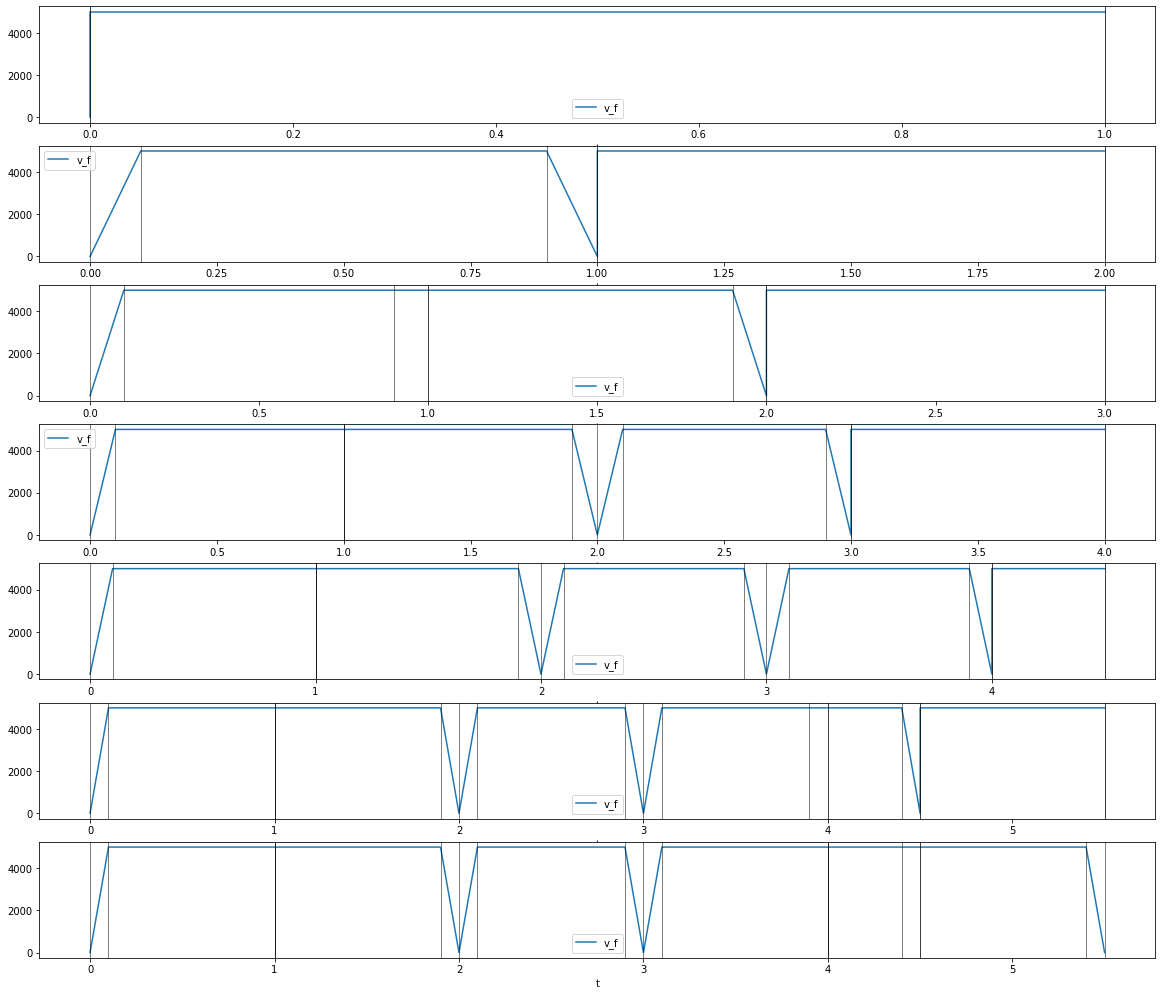

In [3]:

sl = SegmentList([Joint(5_000, 50_000)])
x = 5000


def update_f(sl, s):
    s.update_min_time()
    
    if s.prior_seg:
        s.update_min_time()
    
    s.update_boundary_velocities()
      
    sl.recalc()

explain(sl, ( [x], [x], [-x], [x], [x/2],[x] ), update_f )


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x,sum_x,calc_t
0,0,0,0,5000,1.0,1,5000,5000,0,0,5000,1.0,5000,5000,0,0,5000,5000,5000,5000,1.0
1,0,1,0,5000,1.0,1,5000,5000,0,0,5000,1.0,5000,5000,0,0,5000,5000,5000,5000,1.0


---


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x,sum_x,calc_t
0,0,0,1.0,5000,1.1,1,0,0,250.0,0.1,4500.0,0.8,5000,5000,250.0,0.1,0,5000,4500,5000,1.1
1,0,1,1.0,5000,1.1,1,0,0,250.0,0.1,4500.0,0.8,5000,5000,250.0,0.1,0,5000,4500,5000,1.1
2,1,0,0.0,5000,1.0,1,5000,5000,0.0,0.0,5000.0,1.0,5000,5000,0.0,0.0,5000,5000,5000,5000,1.0
3,1,1,0.0,5000,1.0,1,5000,5000,0.0,0.0,5000.0,1.0,5000,5000,0.0,0.0,5000,5000,5000,5000,1.0


---


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x,sum_x,calc_t
0,0,0,1.0,5000,1.10,1,0,0,250.0,0.1,4500.0,0.8,5000,5000,250.0,0.1,5000,5000,4750,5000,1.05
1,0,1,1.0,5000,1.10,1,0,0,250.0,0.1,4500.0,0.8,5000,5000,250.0,0.1,5000,5000,4750,5000,1.05
2,1,0,1.0,5000,1.05,1,5000,5000,0.0,0.0,4750.0,0.9,5000,5000,250.0,0.1,0,5000,4750,5000,1.05
3,1,1,1.0,5000,1.05,1,5000,5000,0.0,0.0,4750.0,0.9,5000,5000,250.0,0.1,0,5000,4750,5000,1.05
4,2,0,0.0,5000,1.00,-1,5000,5000,0.0,0.0,5000.0,1.0,5000,5000,0.0,0.0,5000,5000,5000,5000,1.00
5,2,1,0.0,5000,1.00,1,5000,5000,0.0,0.0,5000.0,1.0,5000,5000,0.0,0.0,5000,5000,5000,5000,1.00


---


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x,sum_x,calc_t
0,0,0,1.0,5000,1.05,1,0,0,250.0,0.1,4750.0,0.9,5000,5000,0.0,0.0,5000,5000,4750,5000,1.05
1,0,1,1.0,5000,1.05,1,0,0,250.0,0.1,4750.0,0.9,5000,5000,0.0,0.0,5000,5000,4750,5000,1.05
2,1,0,1.0,5000,1.05,1,5000,5000,0.0,0.0,4750.0,0.9,5000,5000,250.0,0.1,0,0,4750,5000,1.05
3,1,1,1.0,5000,1.05,1,5000,5000,0.0,0.0,4750.0,0.9,5000,5000,250.0,0.1,5000,5000,5000,5000,1.00
4,2,0,1.0,5000,1.10,-1,0,0,250.0,0.1,4500.0,0.8,5000,5000,250.0,0.1,0,5000,4500,5000,1.10
5,2,1,1.0,5000,1.05,1,5000,5000,0.0,0.0,4750.0,0.9,5000,5000,250.0,0.1,0,5000,4750,5000,1.05
6,3,0,0.0,5000,1.00,1,5000,5000,0.0,0.0,5000.0,1.0,5000,5000,0.0,0.0,5000,5000,5000,5000,1.00
7,3,1,0.0,5000,1.00,1,5000,5000,0.0,0.0,5000.0,1.0,5000,5000,0.0,0.0,5000,5000,5000,5000,1.00


---


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x,sum_x,calc_t
0,0,0,1.0,5000,1.05,1,0,0,250.0,0.1,4750.0,0.9,5000,5000,0.0,0.0,5000,5000,4750,5000,1.05
1,0,1,1.0,5000,1.05,1,0,0,250.0,0.1,4750.0,0.9,5000,5000,0.0,0.0,5000,5000,4750,5000,1.05
2,1,0,1.0,5000,1.05,1,5000,5000,0.0,0.0,4750.0,0.9,5000,5000,250.0,0.1,0,0,4750,5000,1.05
3,1,1,1.0,5000,1.00,1,5000,5000,0.0,0.0,5000.0,1.0,5000,5000,0.0,0.0,5000,5000,5000,5000,1.00
4,2,0,1.0,5000,1.10,-1,0,0,250.0,0.1,4500.0,0.8,5000,5000,250.0,0.1,0,0,4500,5000,1.10
5,2,1,1.0,5000,1.05,1,5000,5000,0.0,0.0,4750.0,0.9,5000,5000,250.0,0.1,5000,5000,5000,5000,1.00
6,3,0,1.0,5000,1.10,1,0,0,250.0,0.1,4500.0,0.8,5000,5000,250.0,0.1,0,5000,4500,5000,1.10
7,3,1,1.0,5000,1.05,1,5000,5000,0.0,0.0,4750.0,0.9,5000,5000,250.0,0.1,0,5000,4750,5000,1.05
8,4,0,0.0,5000,1.00,1,5000,5000,0.0,0.0,5000.0,1.0,5000,5000,0.0,0.0,5000,5000,5000,5000,1.00
9,4,1,0.0,5000,1.00,1,5000,5000,0.0,0.0,5000.0,1.0,5000,5000,0.0,0.0,5000,5000,5000,5000,1.00


---


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x,sum_x,calc_t
0,0,0,1.0,5000,1.050,1,0,0,250.0,0.1,4750.0,0.900,5000,5000,0.0,0.0,5000,5000,4750,5000,1.050
1,0,1,1.0,5000,1.050,1,0,0,250.0,0.1,4750.0,0.900,5000,5000,0.0,0.0,5000,5000,4750,5000,1.050
2,1,0,1.0,5000,1.050,1,5000,5000,0.0,0.0,4750.0,0.900,5000,5000,250.0,0.1,0,0,4750,5000,1.050
3,1,1,1.0,5000,1.000,1,5000,5000,0.0,0.0,5000.0,1.000,5000,5000,0.0,0.0,5000,5000,5000,5000,1.000
4,2,0,1.0,5000,1.100,-1,0,0,250.0,0.1,4500.0,0.800,5000,5000,250.0,0.1,0,0,4500,5000,1.100
5,2,1,1.0,5000,1.000,1,5000,5000,0.0,0.0,5000.0,1.000,5000,5000,0.0,0.0,5000,5000,5000,5000,1.000
6,3,0,1.0,5000,1.100,1,0,0,250.0,0.1,4500.0,0.800,5000,5000,250.0,0.1,5000,5000,4750,5000,1.050
7,3,1,1.0,5000,1.050,1,5000,5000,0.0,0.0,4750.0,0.900,5000,5000,250.0,0.1,5000,5000,5000,5000,1.000
8,4,0,1.0,5000,1.050,1,5000,5000,0.0,0.0,4750.0,0.900,5000,5000,250.0,0.1,0,5000,4750,5000,1.050
9,4,1,1.0,5000,1.050,1,5000,5000,0.0,0.0,4750.0,0.900,5000,5000,250.0,0.1,0,5000,4750,5000,1.050


---


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x,sum_x,calc_t
0,0,0,1.0,5000,1.05,1,0,0,250.0,0.10,4750.0,0.90,5000,5000,0.0,0.0,5000,5000,4750,5000,1.050000
1,0,1,1.0,5000,1.05,1,0,0,250.0,0.10,4750.0,0.90,5000,5000,0.0,0.0,5000,5000,4750,5000,1.050000
2,1,0,1.0,5000,1.05,1,5000,5000,0.0,0.00,4750.0,0.90,5000,5000,250.0,0.1,0,0,4750,5000,1.050000
3,1,1,1.0,5000,1.00,1,5000,5000,0.0,0.00,5000.0,1.00,5000,5000,0.0,0.0,5000,5000,5000,5000,1.000000
4,2,0,1.0,5000,1.10,-1,0,0,250.0,0.10,4500.0,0.80,5000,5000,250.0,0.1,0,0,4500,5000,1.100000
5,2,1,1.0,5000,1.00,1,5000,5000,0.0,0.00,5000.0,1.00,5000,5000,0.0,0.0,5000,5000,5000,5000,1.000000
6,3,0,1.0,5000,1.05,1,0,0,250.0,0.10,4750.0,0.90,5000,5000,0.0,0.0,5000,5000,4750,5000,1.050000
7,3,1,1.0,5000,1.00,1,5000,5000,0.0,0.00,5000.0,1.00,5000,5000,0.0,0.0,5000,5000,5000,5000,1.000000
8,4,0,1.0,5000,1.05,1,5000,5000,0.0,0.00,4750.0,0.90,5000,5000,250.0,0.1,1000,1000,4800,5000,1.033333
9,4,1,1.0,5000,1.05,1,5000,5000,0.0,0.00,4750.0,0.90,5000,5000,250.0,0.1,5000,5000,5000,5000,1.000000


---


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x,sum_x,calc_t
0,0,0,1.0,5000,1.050,1,0,0,250.0,0.10,4750.0,0.90,5000,5000,0.0,0.00,5000,5000,4750,5000,1.050
1,0,1,1.0,5000,1.050,1,0,0,250.0,0.10,4750.0,0.90,5000,5000,0.0,0.00,5000,5000,4750,5000,1.050
2,1,0,1.0,5000,1.050,1,5000,5000,0.0,0.00,4750.0,0.90,5000,5000,250.0,0.10,0,0,4750,5000,1.050
3,1,1,1.0,5000,1.000,1,5000,5000,0.0,0.00,5000.0,1.00,5000,5000,0.0,0.00,5000,5000,5000,5000,1.000
4,2,0,1.0,5000,1.100,-1,0,0,250.0,0.10,4500.0,0.80,5000,5000,250.0,0.10,0,0,4500,5000,1.100
5,2,1,1.0,5000,1.000,1,5000,5000,0.0,0.00,5000.0,1.00,5000,5000,0.0,0.00,5000,5000,5000,5000,1.000
6,3,0,1.0,5000,1.050,1,0,0,250.0,0.10,4750.0,0.90,5000,5000,0.0,0.00,5000,5000,4750,5000,1.050
7,3,1,1.0,5000,1.000,1,5000,5000,0.0,0.00,5000.0,1.00,5000,5000,0.0,0.00,5000,5000,5000,5000,1.000
8,4,0,1.0,5000,1.032,1,5000,5000,0.0,0.00,4760.0,0.92,5000,5000,240.0,0.08,1000,1000,4840,5000,1.032
9,4,1,1.0,5000,1.000,1,5000,5000,0.0,0.00,5000.0,1.00,5000,5000,0.0,0.00,5000,5000,5000,5000,1.000


---


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x,sum_x,calc_t
0,0,0,1.0,5000,1.050,1,0,0,250.0,0.10,4750.0,0.90,5000,5000,0.0,0.00,5000,5000,4750,5000,1.050
2,1,0,1.0,5000,1.050,1,5000,5000,0.0,0.00,4750.0,0.90,5000,5000,250.0,0.10,0,0,4750,5000,1.050
4,2,0,1.0,5000,1.100,-1,0,0,250.0,0.10,4500.0,0.80,5000,5000,250.0,0.10,0,0,4500,5000,1.100
6,3,0,1.0,5000,1.050,1,0,0,250.0,0.10,4750.0,0.90,5000,5000,0.0,0.00,5000,5000,4750,5000,1.050
8,4,0,1.0,5000,1.032,1,5000,5000,0.0,0.00,4760.0,0.92,5000,5000,240.0,0.08,1000,1000,4840,5000,1.032
10,5,0,0.2,10,0.020,1,1000,1000,10.0,0.02,0.0,0.18,5000,0,0.0,0.00,0,0,10,10,0.020
12,6,0,1.0,5000,1.100,1,0,0,250.0,0.10,4500.0,0.80,5000,5000,250.0,0.10,0,0,4500,5000,1.100


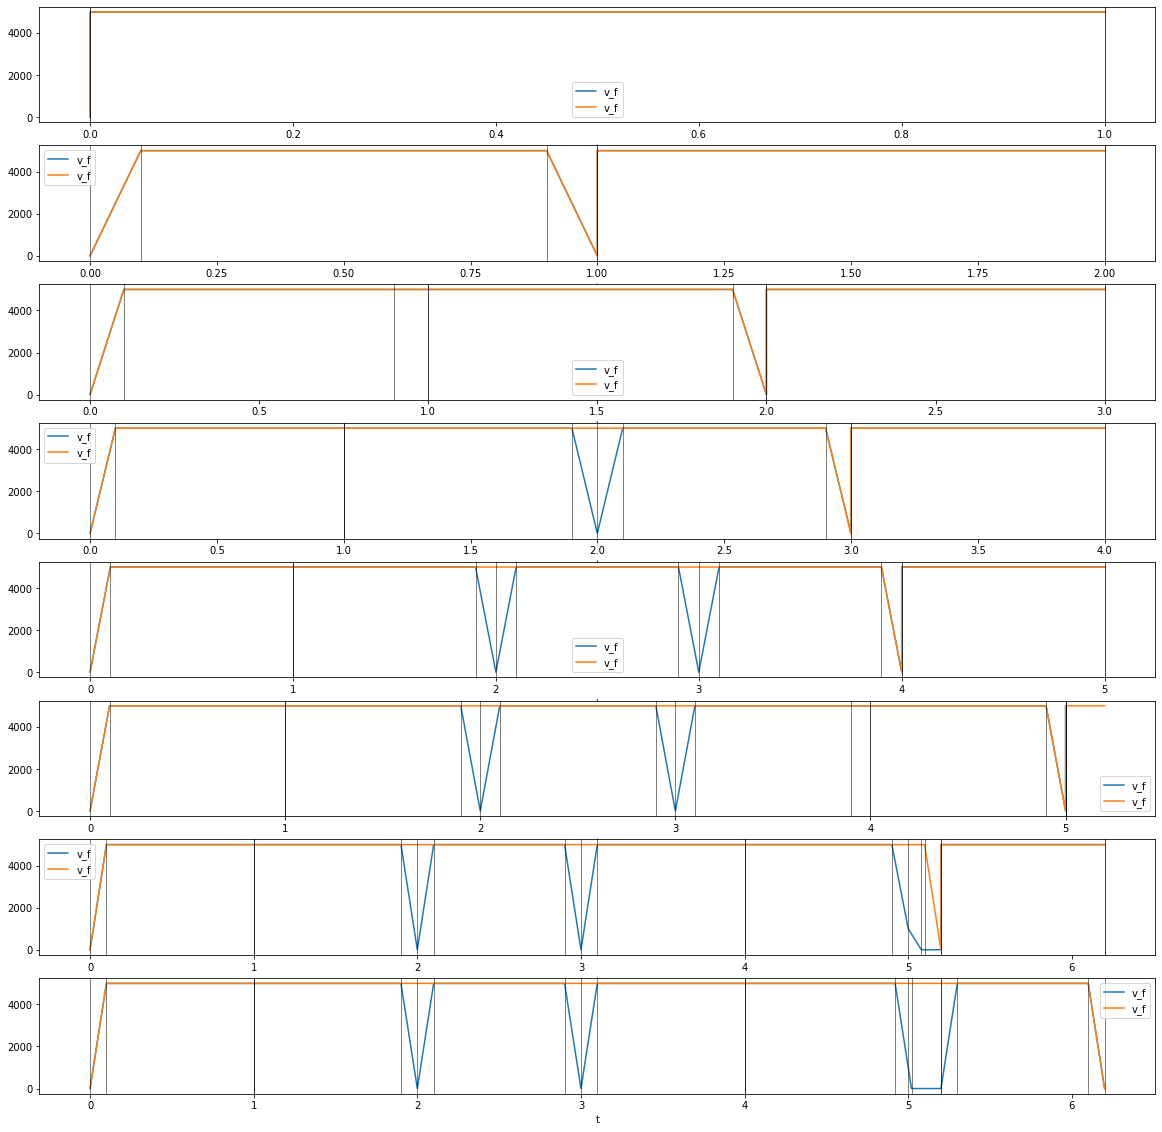

In [4]:


sl = SegmentList([Joint(5_000, 50_000), Joint(5_000, 50_000)])
x = 5000


def update_f(sl, s):
    s.update_min_time()
    
    s.update_boundary_velocities()
        
    sl.recalc()

explain(sl, ( [x,x], [x,x], [-x,x], [x,x], [x,x], [10,1000], [x,x] ), update_f )

t = sl.params
t[t.js == 0]

0.05555555555555555


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x,sum_x,calc_t
0,0,0,0.7,3000,0.7,1,0,0,250.0,0.1,2500.0,0.5,5000,5000,250.0,0.1,0,0,3000,3000,0.7
1,1,0,0.7,3000,0.7,-1,0,0,250.0,0.1,2500.0,0.5,5000,5000,250.0,0.1,0,0,3000,3000,0.7
2,2,0,0.6,3000,0.7,1,0,0,250.0,0.1,2500.0,0.4,5000,5000,250.0,0.1,0,0,2500,3000,0.7


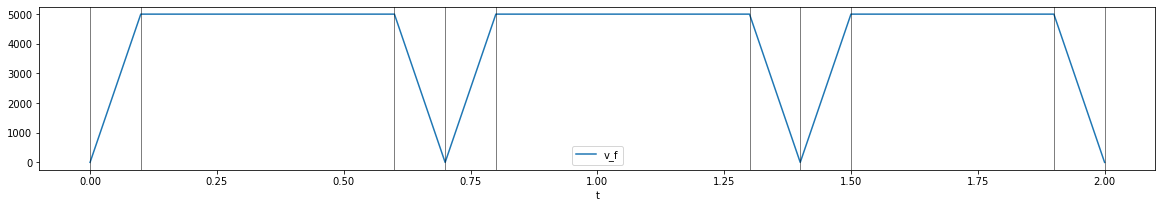

In [23]:

x = 3000

class TestSL(SegmentList):
    pass

sl = TestSL([Joint(5_000, 50_000)])
    
sl.rmove([x]);
sl.rmove([-x]);
sl.rmove([x]);
print(sl.err_x())

plot_segment_list(sl.dataframe)
sl.params

0.015543253438140886


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x,sum_x,calc_t
0,0,0,0.70,3000,0.70,1,0,0,250.0,0.10,2500.0,0.50,5000,5000,250.0,0.1,1000,1000,3050,3000,0.683333
1,0,1,0.70,3000,0.70,1,0,0,250.0,0.10,2500.0,0.50,5000,5000,250.0,0.1,5000,5000,3250,3000,0.650000
2,1,0,0.25,10,0.02,1,1000,1000,10.0,0.02,0.0,0.23,5000,0,0.0,0.0,0,0,10,10,0.020000
3,1,1,0.25,1000,0.25,1,5000,5000,0.0,0.00,1000.0,0.25,5000,4000,0.0,0.0,4000,5000,1000,1000,0.250000
4,2,0,0.70,3000,0.70,1,0,0,250.0,0.10,2500.0,0.50,5000,5000,250.0,0.1,0,0,3000,3000,0.700000
5,2,1,0.70,3000,0.70,1,5000,4000,90.0,0.02,2660.0,0.58,5000,4586,250.0,0.1,0,0,2975,3000,0.709986


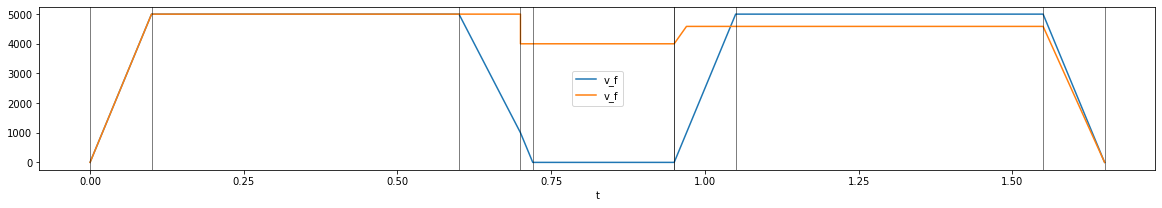

In [19]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 3000


class TestSL(SegmentList):
    pass

sl = TestSL([Joint(5_000, 50_000),Joint(5_000, 50_000)])
    
sl.rmove([x,x]);
sl.rmove([10,1000]);
sl.rmove([x,x]);
print(sl.err_x())

plot_segment_list(sl.dataframe)
sl.params


In [6]:
[ e for e in sl[0].updates if 'v1' in e]

['0/0 ubv_v1max 5000->0',
 '0/1 ubv_v1max 5000->0',
 '0/0 rc_v1_change 0->1000.0',
 '0/1 rc_v1_change 0->5000']

In [7]:
[ e for e in sl[1].updates if 'v1' in e]

['1/0 ubv_v1max 5000->0.0',
 '1/1 ubv_v1max 5000->0',
 '0/0 rc_v1_change 0->1000.0',
 '0/1 rc_v1_change 0->5000',
 '1/0 ubv_v1max 5000->0.0',
 '1/1 rc_v1_change 0->5000',
 '1/1 rc_v1_change 5000->4000.0']

In [8]:
for s in sl.segments:
    print(s.n, s.needs_update)

0 False
1 False
2 False


,seg,js,seg_t,x,t,dir,v_0_max,v_0,x_a,t_a,x_c,t_c,v_c_max,v_c,x_d,t_d,v_1,v_1_max,calc_x,sum_x,calc_t
0,0,0,0.70000,3000,0.70,1,0,0,250.0,0.10000,2.500000e+03,0.50000,5000,5000,250.0,0.1,3162,3162,3158,3000,0.661257
2,1,0,0.65000,100,0.65,1,3162,3162,100.0,0.06325,1.421085e-14,0.58675,5000,0,0.0,0.0,0,0,100,100,0.650000
4,2,0,0.70000,3000,0.70,1,0,0,250.0,0.10000,2.500000e+03,0.50000,5000,5000,250.0,0.1,0,0,3000,3000,0.700000
6,3,0,0.65034,0,0.00,0,0,0,0.0,0.00000,0.000000e+00,0.65034,0,0,0.0,0.0,0,0,0,0,0.000000
8,4,0,0.60000,3000,0.70,1,0,0,250.0,0.10000,2.500000e+03,0.40000,5000,5000,250.0,0.1,0,0,2500,3000,0.700000


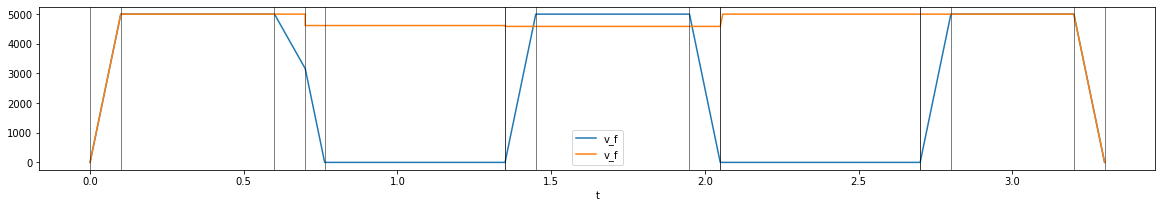

In [9]:

sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 3000

sl.rmove([x,x]);
sl.rmove([100,x]);
sl.rmove([x,x]);
sl.rmove([0,x]);
sl.rmove([x,x]);


plot_segment_list(sl.dataframe)
t = sl.params
t[t.js == 0]

In [10]:
# Very Short Segment
sl = SegmentList([Joint(5_000, 50_000)])

x = 501



sl.rmove([x]) ; 
plot_segment_list(sl.dataframe)
print(sl[0,0].debug)
sl.params

TimeRecalc: 1.0|0.1002 0.1,250.0 0.1,250.0

In [ ]:
# Very Short Segment
sl = SegmentList([Joint(5_000, 50_000)])

x = 499


sl.rmove([x]) ; 
plot_segment_list(sl.dataframe)
print(sl[0,0].debug)
sl.params

In [ ]:
sl = SegmentList([Joint(5_000, 50_000)])

x = 5000

fig, axes = plt.subplots(5,1, figsize=(20,15))
axes = np.ravel(axes)
axi = 0

sl.rmove([x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl); print('---')
sl.rmove([x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl); print('---')
sl.rmove([x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl); print('---')
sl.update(); plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl); print('---')
sl.update(); plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1

In [ ]:
from trajectory.planner import accel_x

js = sl.segments[0].joint_segments[0]

def min_t(self):
    print(self.t, self.segment.t)
    
    v_c = self.v_c
    
    self.x_a, self.t_a = accel_x(self.v_0, v_c, self.joint.a_max)
    self.x_d, self.t_d = accel_x(v_c, self.v_1, self.joint.a_max)
    
    print(v_c, self.segment.t - self.t_a - self.t_d)
    
    
min_t(js)

In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 1500

for i in range(10):
    sl.rmove([x,x])


print(sl)
plot_segment_list(sl.dataframe)

sl.reset()
sl.update(limit=None)
sl.update(limit=None)
sl.update(limit=None)

print('----')
print(sl)
plot_segment_list(sl.dataframe)


In [ ]:
js = sl.segments[1].joint_segments[0]
print(js)
(js.t_a, js.t_c, js.t_d), (js.v_0_max, js.v_0 ,js.v_c, js.v_1, js.v_1_max)

In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 5000

sl.rmove([x,x])
sl.rmove([x/10,x])
sl.rmove([x,x])

sl.update()

print(sl)
    
plot_segment_list(sl.dataframe)



In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 5000

fig, axes = plt.subplots(3,1, figsize=(20,7))
axes = np.ravel(axes)
axi = 0

sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1

print(sl)





In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 5000

fig, axes = plt.subplots(3,1, figsize=(20,7))
axes = np.ravel(axes)
axi = 0

sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([0,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1

print(sl)

for s in sl.segments:
    print(s.err_t, s.t, [js.t for js in s.joint_segments])


In [ ]:

sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 5000

fig, axes = plt.subplots(9,1, figsize=(20,15))
axes = np.ravel(axes)
axi = 0

sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([-x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,-x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([-x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,0]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([0,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
sl.rmove([x,x]) ; plot_segment_list(sl.dataframe, ax=axes[axi]); axi += 1
print(sl)


In [ ]:
sl.dataframe.set_index(['t','axis']).sort_index().reset_index()

In [ ]:
# a = 7550 passes, 7499 does not. 
sl = SegmentList([Joint(5_000, 7_499),Joint(5_000, 7_499)])

x = 5000

sl.rmove([x,x])
sl.rmove([-x,x])
sl.rmove([x,-x])
sl.rmove([-x,x])
sl.rmove([x,x])
for i in range(10):
    sl.update()
    print(round(sl.err_t,5), round(sum([s.err_t for s in sl.segments]), 5), [ (s.n_updates, s.err_t) for s in sl.segments])
    print('===')

plot_segment_list(sl.dataframe)

In [ ]:
print([s.err_t for s in sl.segments])

In [ ]:
sl.rmove([x,x])
sl.update()
sl.update() 
sl.update()
plot_segment_list(sl.dataframe)



In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 2000

sl.rmove([x, x])
sl.rmove([x,x/2])
sl.rmove([x,2*x])
sl.rmove([x,x])

for e in sl.segments:
    e.update()

print(sl)
plot_segment_list(sl.dataframe)
sl.dataframe_stacked

In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 3000

sl.rmove([x, x])
sl.rmove([x,x/2])
sl.rmove([x,2*x])
sl.rmove([x,x])
sl.rmove([x,x])

sl.update()

print(sl)
plot_segment_list(sl.dataframe)
sl.dataframe_stacked

In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 3000

sl.rmove([x, x])
sl.rmove([x/2, x])
sl.rmove([x, x])

sl.update()

print(sl)
plot_segment_list(sl.dataframe)
sl.dataframe_stacked

In [ ]:
sl = SegmentList([Joint(5_000, 50_000),Joint(5_000, 50_000)])

x = 5000

sl.rmove([x, x])
sl.rmove([0, x])
sl.rmove([x, x])
sl.rmove([-x, x])
sl.rmove([x, x])

sl.update()

print(sl)
plot_segment_list(sl.dataframe)
sl.dataframe_stacked

In [ ]:
def max_v_0(x, a):
    """Return the maximum v_0 for a segment of distance x such that  we can
    decelerate and not exceede distance x"""

    # decel time t = v0/a
    # x = (v_i+v_f)/2 * t -> v0/2 * t
    # x = v0/2 * v0/a
    # x = v0^2/2a
    return sqrt(2 * a * x)

max_v_0(100,50_000)